<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-10-01<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
        快速开始：点击上方的 <span style="background-color:rgb(85, 91, 228); color:white; padding: 3px; border-radius: 5px;box-shadow: 2px 2px 3px rgba(0, 0, 0, 0.3); font-size:0.75rem;">开始连接</span> 按钮，选择 <span style='color:rgb(85,91,228); font-weight:bold'>lammps:23Jun2022-dp2.15</span> 镜像及 <span style='color:rgb(85,91,228); font-weight:bold'>c2_m4_cpu</span> 节点配置，稍等片刻即可运行。
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](http://www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节7.3）

<a href="https://item.jd.com/10089064828853.html"><img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true"  width="200"/></a>
<a href="https://item.jd.com/10089064828853.html">点击购书</a>


* [1. LAMMPS单点计算](#singlepoint)
* [2. LAMMPS循环控制](#loopcontrol)
* [3. 结果分析与可视化](#analysis)
* [参考](#references)

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')

    import os
    original_path = '/content/gdrive/MyDrive/Colab_Modules/lammps/build/lmp'
    link_path = '/content/lmp'

    # Create a symbolic link
    os.symlink(original_path, link_path)
    !chmod +x lmp

    current_directory = os.getcwd()
    os.environ["PATH"] += os.pathsep + current_directory

    COLAB = True
except:
    COLAB = False

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<a name="singlepoint"></a>
# 1. LAMMPS单点计算

LAMMPS脚本主要描述了一个面心立方（fcc）晶格的原子模拟过程。首先，该脚本采用了Lennard-Jones单位系统，并为模拟设置了三个方向的周期性边界条件。原子风格被设置为"atomic"，意味着系统中的每个原子都被视为一个不可分割的实体。接下来，定义了一个面心立方的晶格，并在此基础上建立了一个从(0,0,0)到(1,1,1)的模拟区域。在这个区域内，创建了一个包含单一原子类型的模拟盒子，并在每个晶格点上放置了原子。这些原子的质量被设置为1.0。接着，为原子之间的相互作用选择了Lennard-Jones势，并设置了相应的参数值。为了获取关于系统的信息，定义了两个变量：一个表示系统的势能，另一个表示模拟盒子的边长。最后，执行了0步模拟来初始化系统，并打印出计算得到的晶格常数和氩的凝聚能。

In [ ]:
%%writefile in.Ar_single_point

units lj
boundary p p p
atom_style atomic

lattice    fcc 1.00
region     box block 0 1 0 1 0 1
create_box 1 box
create_atoms 1 box
mass 1 1.0

pair_style  lj/cut  4.0
pair_coeff  1  1  1.0  1.0  4.0

variable P equal pe
variable L equal (count(all)/1.00)^(1/3)
run 0
print  "Lattice constant: $L"
print  "Cohesive Energy of Ar: $P"

Overwriting in.Ar_single_point


In [ ]:
!OMP_NUM_THREADS=2 lmp -i in.Ar_single_point

LAMMPS (2 Aug 2023 - Update 1)
  using 2 OpenMP thread(s) per MPI task
Lattice spacing in x,y,z = 1.5874011 1.5874011 1.5874011
Created orthogonal box = (0 0 0) to (1.5874011 1.5874011 1.5874011)
  1 by 1 by 1 MPI processor grid
Created 4 atoms
  using lattice units in orthogonal box = (0 0 0) to (1.5874011 1.5874011 1.5874011)
  create_atoms CPU = 0.000 seconds
Generated 0 of 0 mixed pair_coeff terms from geometric mixing rule
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 4.3
  ghost atom cutoff = 4.3
  binsize = 2.15, bins = 1 1 1
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair lj/cut, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d
      bin: standard
Setting up Verlet run ...
  Unit style    : lj
  Current step  : 0
  Time step     : 0.005
Per MPI rank memory allocation (min/avg/max) = 3.87

<a name="loopcontrol"></a>
# 2. LAMMPS循环控制

这个LAMMPS脚本与之前的脚本在构建和模拟原子系统的初步设置上大致相同，但主要的不同之处在于它加入了一个循环结构，用于探索不同的晶格常数下的凝聚能。以下是针对循环部分的详细解读：

1. **循环的设置**：通过标签`label loop_i`和变量`variable i  loop  50`，脚本设定了一个循环，该循环将运行50次。
   
2. **晶格参数变化**：`variable x  equal  1.02+0.002*$i`定义了一个变量`x`，它表示面心立方晶格的晶格常数，从1.02开始，每次循环增加0.002。这意味着脚本将探索从1.02到1.12范围内的晶格常数。

3. **创建模拟系统**：对于每一个晶格常数，脚本都创建一个新的模拟盒子和原子，设置质量和原子间的相互作用方式，与前一个脚本类似。

4. **计算和打印**：系统的势能和晶格常数被计算并打印出来。这两个变量`P`和`L`分别表示势能和晶格常数，其中势能表示为`pe`，而晶格常数是由原子数和模拟盒子的体积计算得到的。

5. **清除和循环**：`clear`命令用于清除当前的模拟状态，为下一次循环设置新的晶格常数做准备。`next i`和`jump SELF loop_i`指令用于控制循环结构，使其在完成当前迭代后跳转回`loop_i`标签，开始下一次迭代。

总之，与前一个脚本相比，这个脚本使用了循环结构来系统地探索一系列的晶格常数，并为每一个晶格常数计算凝聚能，从而能够更全面地了解不同晶格常数下的物质属性。

In [ ]:
%%writefile in.Ar_loop

units lj
boundary p p p
atom_style atomic

label loop_i
variable i  loop  50
variable x  equal  1.02+0.002*$i

lattice fcc $x
region     box block 0 1 0 1 0 1
create_box 1 box
create_atoms 1 box
mass 1 1.0

pair_style  lj/cut  4.0
pair_coeff  1  1  1.0  1.0  4.0

variable P equal pe
variable L equal (count(all)/$x)^(1/3)

run 0
print  "Cohesive Energy of Ar a = $L E = $P"
clear
next i
jump SELF loop_i


Overwriting in.Ar_loop


用%%capture来禁止屏幕输出

In [ ]:
%%capture
!OMP_NUM_THREADS=2 lmp -i in.Ar_loop

计算完成后，我们可以用grep命令来查看能量`E`随晶格常数`a`的变化

In [ ]:
!grep 'Cohesive' log.lammps

print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.57592797583561 E = -8.33145850509292
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.57490131236859 E = -8.33807134579063
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.57387731902894 E = -8.34449337732872
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.57285598368759 E = -8.35072340593282
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.57183729429402 E = -8.35676023549933
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.5708212388756 E = -8.36260266759513
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.56980780553695 E = -8.36824950145807
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.5687969824593 E = -8.40886495772643
print  "Cohesive Energy of Ar a = $L E = $P"
Cohesive Energy of Ar a = 1.5677887578998 E = -8.41425285507882
print  "Cohes

<a name="analysis"></a>
# 3. 结果分析与可视化

这段代码的主要目的是从从LAMMPS的日志文件log.lammps中提取与Ar的凝聚能相关的数据，特别是在不同的晶格常数a下的能量值E。以下是该代码的详细解释：

1. **导入必要的模块**：`import re` — 这一行导入了Python的正则表达式模块，用于匹配字符串中的特定模式。

2. **初始化列表**：`matching_lines = []` — 这是一个空列表，用于保存匹配到的行信息。

3. **定义正则表达式模式**：`pattern = re.compile(r"Cohesive Energy of Ar a = ([\d\.-]+)\s+E = ([\d\.-]+)")` — 这里定义了一个正则表达式模式，用于匹配含有“Cohesive Energy of Ar a = * E = *”这种模式的行，并从中提取a值和E值。

4. **读取和搜索文件**：
    - 使用`with open('./log.lammps', 'r') as file:`打开文件，并确保文件在操作完成后正确关闭。
    - 通过`for line in file:`遍历文件中的每一行。
    - 使用`pattern.search(line)`方法搜索每一行中的匹配模式。
    - 如果找到匹配的模式，它会提取a值（match.group(1)）和E值（match.group(2)），并将这两个值作为一个元组添加到`matching_lines`列表中。

5. **输出匹配的行**：`matching_lines[:10]` — 这一行将显示列表中前10个匹配到的元组，每个元组包含一个a值和一个E值。

In [ ]:
# Read the file and search for lines containing the pattern "Cohesive Energy of Ar a = * E = *"
import re

# Initialize list to hold the matching lines
matching_lines = []

# Define the regex pattern for capturing a and E values
pattern = re.compile(r"Cohesive Energy of Ar a = ([\d\.-]+)\s+E = ([\d\.-]+)")

# Read the file and search for the pattern
with open('./log.lammps', 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            a_value = float(match.group(1))
            E_value = float(match.group(2))
            matching_lines.append((a_value, E_value))

# Show some of the matching lines
matching_lines[:10]


[(1.57592797583561, -8.33145850509292),
 (1.57490131236859, -8.33807134579063),
 (1.57387731902894, -8.34449337732872),
 (1.57285598368759, -8.35072340593282),
 (1.57183729429402, -8.35676023549933),
 (1.5708212388756, -8.36260266759513),
 (1.56980780553695, -8.36824950145807),
 (1.5687969824593, -8.40886495772643),
 (1.5677887578998, -8.41425285507882),
 (1.56678312019097, -8.41944179972544)]

为了方便后期读取，我们把结果存到Ar_fcc.csv的文件中

In [ ]:
# Write the extracted a and E values to a CSV file
with open('Ar_fcc.csv', 'w') as f:
    f.write("a,E\n")  # Write header
    for a, E in matching_lines:
        f.write(f"{a},{E}\n")


进行可视化与二次抛物线拟合

a,b,c = 153.45467584089377 -473.9734813931492 357.5047924787406
Emin = -8.484154799846067 opt_lat = 1.5443435620188548


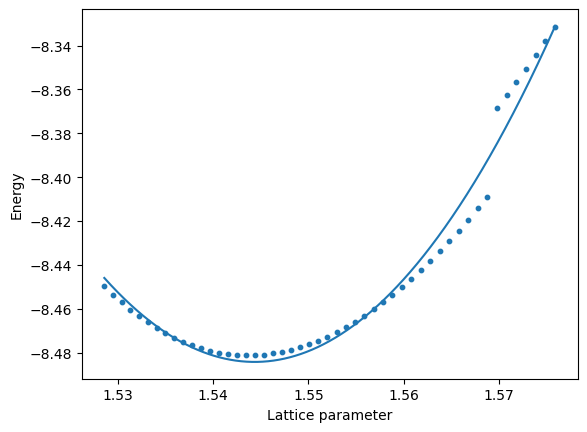

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 读取数据（之前存储的csv文件）：
filename = "Ar_fcc.csv"
DataFrame = pd.read_csv(filename)
lat = np.array(DataFrame['a'])
ene = np.array(DataFrame['E'])
# 用二次函数拟合：
a,b,c = np.polyfit(lat,ene,2)
mesh = np.linspace(np.min(lat),np.max(lat),1000)
opt_lat = -b/(2*a)
Emin = np.polyval([a,b,c], opt_lat)
print("a,b,c =",a,b,c)
print("Emin =",Emin,"opt_lat =",opt_lat)

# 数据可视化：
plt.scatter(lat, ene, 10)
plt.plot(mesh, a*mesh**2+b*mesh+c)
plt.xlabel('Lattice parameter')
plt.ylabel('Energy')
plt.show()


我们可以在$a=1.57\sigma$附近明显看到能量的一个阶跃。这个主要是由于LJ势的有限截断导致的。这个a所对应的原子间最近邻距离为$1.11\sigma$左右。fcc晶体中，前几个近邻原子与最近邻距离的比值分别为：

$[1.0,1.4142,1.7321,2.0,2.2361,2.4495,2.8284,3.0,3.1623,3.3166,3.4641,3.6056,3.7417,4.0,...]$

其中第12近邻与最近邻的比值为3.6056.当最近邻距离为$1.11\sigma$时，第12近邻的距离为$4.00\sigma$。所以当我们的a比$1.57\sigma$稍大时，第12近邻的相互作用因为截断未有被包含，而当a比$1.57\sigma$稍小时，第12近邻的相互作用被包含。两者之间的差别导致了$1.57\sigma$附近的势能曲线不连续。

为了消除这里的不连续得到平衡位置附近更为准确的势能曲线，最简单的方法是增大LJ势的截断。我们只需将

```
pair_style  lj/cut  4.0
pair_coeff  1  1  1.0  1.0  4.0
```

改成
```
pair_style  lj/cut  8.0
pair_coeff  1  1  1.0  1.0  8.0
```

得到的将是如下的能量曲线图，最优的a=1.542。

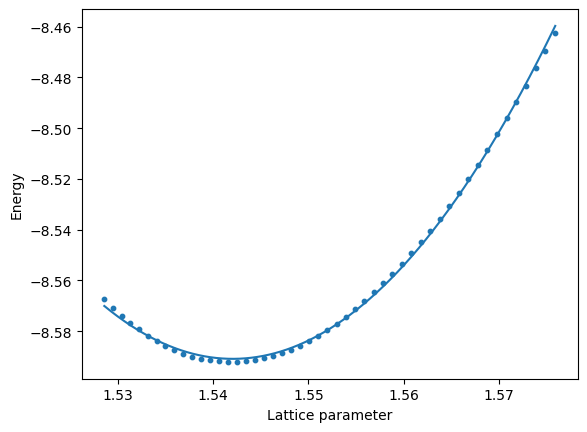

# 4.参考

- [《计算材料学：从算法原理到代码实现》单斌、陈征征、陈蓉 著，华中科技大学出版社](http://www.materialssimulation.com/book)